### 创建数组对象

创建`ndarray`对象有很多种方法，下面我们介绍一些常用的方法。

方法一：使用`array`函数，通过`list`创建数组对象

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

array1 = np.array([1, 2, 3, 4, 5])
print("array1:", array1)
array2 = np.array([[1, 2, 3], [4, 5, 6]])
print("array2:")
print(array2)

array1: [1 2 3 4 5]
array2:
[[1 2 3]
 [4 5 6]]


方法二：使用`arange`函数，指定取值范围和跨度创建数组对象

In [2]:
array3 = np.arange(0, 20, 2)
print("array3")
print(array3)

array3
[ 0  2  4  6  8 10 12 14 16 18]


## 为什么输出的数组每个元素之间没有逗号隔开？而且为什么前几个数字的间隔比后面的宽？
这是因为NumPy数组的默认打印格式设计：
### 为什么没有逗号？
NumPy数组打印时使用空格分隔而不是逗号，这是为了：
- 更清晰的数值显示 - 避免逗号干扰数字阅读
- 节省空间 - 特别是大型数组时更紧凑
- 科学计算习惯 - 符合数学和科学领域的数组表示惯例
### 为什么间距不均匀？
NumPy会自动对齐数字以提高可读性：
- 单位数字（0, 2, 4, 6, 8）占1个字符位置
- 十位数字（10, 12, 14, 16, 18）占2个字符位置
- NumPy按最宽的数字来对齐所有元素，所以前面的单位数看起来间距更宽

这与Python列表的[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]格式完全不同，NumPy的格式更适合数值计算和矩阵显示。

---

方法三：使用`linspace`函数，用指定范围和元素个数创建数组对象，生成等差数列

In [3]:
array4 = np.linspace(-1, 1, 11)
print("array4")
print(array4)

array4
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


### 1. 为什么这里会生成：`[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]`即使是单位数字，也有一个小数点，看起来很奇怪。
为什么会显示小数点？

NumPy的linspace函数默认生成浮点数类型（float64），即使结果是整数也会显示为浮点格式。这是因为：
- 等差数列计算需要精确的浮点运算 - 从-1到1分成11个点，步长是0.2，需要浮点数来保证精度
- 保持数据类型一致性 - 整个数组必须是同一种数据类型，由于有0.2、0.4这样的小数，所以统一为float64

### 2. `linspace(start, stop, num)`的具体原理
- start: 起始的具体数值
- stop: 结束的具体数值
- num: 要生成的点的个数

函数会自动计算步长：`步长 = (stop - start) / (num - 1)`

例如你的代码：`linspace(-1, 1, 11)`
- 从-1开始，到1结束
- 生成11个点
- 步长 = `(1 - (-1)) / (11-1) = 2/10 = 0.2`

所以得到：`[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]`

关键点：linspace总是包含起始值和结束值，然后在中间均匀分布剩余的点。

---

方法四：使用`logspace`函数，生成等比数列

In [4]:
array5 = np.logspace(1, 10, num=10, base=2)  # 即从2^1开始，到2^10结束，生成10个数字
print(array5)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


方法五：通过`fromstring`函数从字符串提取数据创建数组对象

In [5]:
# 通过fromstring函数，从字符串提取数据创建数组对象
array6 = np.fromstring("1,2,3,4,5,8", sep=",", dtype="i8")
print(array6)

[1 2 3 4 5 8]


### 1. `np.fromstring() 参数解释`
- 第一个参数 '1,2,3,4,5,8': 输入的字符串，包含要转换为数组的数据
- sep=',': 分隔符参数，指定字符串中数据之间的分隔符是逗号
- dtype='i8': 数据类型参数，'i8' 表示64位有符号整数（int64）

结果: 将字符串 '1,2,3,4,5,8' 按逗号分割，转换为包含6个int64整数的NumPy数组：[1 2 3 4 5 8]
### 2. `i8 = int64 `的原因
i8 中的数字表示字节数，不是位数：
- i8 = 8字节 的整数 = 8 × 8 = 64位 整数
- i4 = 4字节 = 32位整数
- i2 = 2字节 = 16位整数
- i1 = 1字节 = 8位整数

NumPy的dtype命名规则：[类型字母][字节数]
- i = signed integer（有符号整数）
- u = unsigned integer（无符号整数）
- f = float（浮点数）

所以 i8 就是"8字节的有符号整数"，即 int64。

### 3. sep 参数说明
必须手动指定分隔符，NumPy不会自动识别。

可以使用其他分隔符：
- sep=' ' - 空格分隔："1 2 3 4"
- sep=';' - 分号分隔："1;2;3;4"
- sep='-' - 横线分隔："1-2-3-4"
- sep='\t' - 制表符分隔

注意：分隔符必须与字符串中实际使用的分隔符完全匹配，否则解析会失败。

---

方法六：通过`fromiter`函数从生成器（迭代器）中获取数据创建数组对象

In [6]:
def fib(how_many):
    a, b = 0, 1
    for _ in range(how_many):
        a, b = b, a + b
        yield a


gen = fib(50)
array7 = np.fromiter(gen, dtype="i8")
print(array7)

[          1           1           2           3           5           8
          13          21          34          55          89         144
         233         377         610         987        1597        2584
        4181        6765       10946       17711       28657       46368
       75025      121393      196418      317811      514229      832040
     1346269     2178309     3524578     5702887     9227465    14930352
    24157817    39088169    63245986   102334155   165580141   267914296
   433494437   701408733  1134903170  1836311903  2971215073  4807526976
  7778742049 12586269025]


方法七：使用`numpy.random`模块的函数生成随机数创建数组对象

产生 10 个 $\small{[0, 1)}$ 范围的随机小数

In [7]:
array8 = np.random.rand(10)
print(array8)

[0.44607764 0.36711881 0.71300119 0.97359592 0.88965192 0.04138465
 0.6400844  0.71636002 0.54103955 0.91309257]


产生 10 个 $\small{[1, 100)}$ 范围的随机10个整数

In [8]:
arr9 = np.random.randint(1, 100, 10)
print(arr9)

[94 46 19 63 57  5 65 81 13 28]


产生 20 个 $\small{\mu=50}$ ， $\small{\sigma=10}$ 的正态分布随机数

In [9]:
arr10 = np.random.normal(50, 10, 20)
print(arr10)

[55.51509615 50.03481929 34.53108817 66.218235   50.84222307 32.10207654
 49.63235836 23.93733203 47.52724322 60.27863266 44.52796451 61.18014081
 53.47874859 64.28340721 44.27305225 41.23293244 46.10933412 50.29332799
 56.33069385 46.45453762]


产生 $\small{[0, 1)}$ 范围的随机小数构成的 3 行 4 列的二维数组，

In [10]:
arr11 = np.random.rand(3, 4)
print(arr11)

[[0.23872088 0.67438806 0.56379847 0.78579444]
 [0.90033341 0.42259254 0.77093926 0.35448427]
 [0.52084907 0.36070588 0.49445074 0.21981722]]


产生 $\small{[1, 100)}$ 范围的随机整数构成的三维数组，

In [11]:
arr12 = np.random.randint(1, 100, (3, 4, 5))
print(arr12)
print(arr12[0][0][2])

[[[67 93 91 40  8]
  [91 52 11 14 44]
  [95 88 27 77 48]
  [56 81 31 15 94]]

 [[78 24 95  6  3]
  [85 30 96 53 74]
  [43 51  3 64 23]
  [53  1 78 71 45]]

 [[71 59 33 38 68]
  [43 21 47 98 45]
  [33 45  5 13  9]
  [91 84 26 31 22]]]
91


### 二维数组是行和列，那三维数组要怎么理解呢？
三维数组可以理解为多个二维数组的堆叠。

在你的代码 (3, 4, 5) 中：
- 第1个维度(3): 有3个"层"或"页面"
- 第2个维度(4): 每层有4行
- 第3个维度(5): 每行有5列

形象比喻: 想象一本书📚
- 3 = 书有3页
- 4 = 每页有4行文字
- 5 = 每行有5个字

访问方式: arr12[页, 行, 列]，比如 arr12[0, 1, 2] 表示第1页第2行第3列的元素。

---

方法八：创建全0、全1或指定元素的数组

In [12]:
# 全0
arr13 = np.zeros((3, 4))
print(arr13)
print("=" * 50)
# 全1
arr14 = np.ones((3, 4))
print(arr14)
print("=" * 50)

# 指定元素，使用full函数
arr15 = np.full((3, 4), 24)
print(arr15)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[24 24 24 24]
 [24 24 24 24]
 [24 24 24 24]]


方法九：使用`eye`函数创建单位矩阵

In [13]:
arr16 = np.eye(4)
print(arr16)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


方法十：读取图片获得对应的三维数组

In [14]:
arr17 = plt.imread("finder.png")
print(arr17)

[[[0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.20784314]
  ...
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]]

 [[0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.20784314]
  ...
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]]

 [[0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.20784314]
  [0.15686275 0.16470589 0.21176471]
  ...
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]
  [0.16078432 0.17254902 0.21960784]]

 ...

 [[0.16078432 0.17254902 0.21568628]
  [0.16078432 0.17254902 0.21568628]
  [0.16078432 0.17254902 0.21960784]
  ...
  [0.16862746 0.18039216 0.23529412]
  [0.16862746 0.18039216 0.23529412]
  [0.16862746 0.18039216 0.23529412]]

 [[0.16078432 0.17254902 0.21568628]
  [0.16078432 0.17254902 0.21568628]


**说明**：上面的代码读取了当前路径下名为`finder.png` 的图片文件，计算机系统中的图片通常由若干行若干列的像素点构成，而每个像素点又是由红绿蓝三原色构成的，刚好可以用三维数组来表示。读取图片用到了`matplotlib`库的`imread`函数。

 ### 数组对象的属性
 `size`属性：获取数组元素个数。

In [15]:
print(arr16.size)
print(arr17.size)

16
31212


`shape`属性：获取数组的形状。

In [16]:
print(arr16.shape)
print(arr17.shape)

(4, 4)
(102, 102, 3)


`dtype`属性：获取数组元素的数据类型。

In [17]:
print(arr16.dtype)
print(arr17.dtype)

float64
float32


`ndim`属性：获取数组的维度。

In [18]:
print(arr16.ndim)
print(arr17.ndim)

2
3


`itemsize`属性：获取数组单个元素占用内存空间的字节数。

In [19]:
print(arr16.itemsize)
print(arr17.itemsize)

8
4


`nbytes`属性：获取数组所有元素占用内存空间的字节数。

In [20]:
print(arr16.nbytes)
print(arr17.nbytes)

128
124848


### 数组的索引运算
和 Python 中的列表类似，NumPy 的`ndarray`对象可以进行索引和切片操作，通过索引可以获取或修改数组中的元素，通过切片操作可以取出数组的一部分，我们把切片操作也称为切片索引。
#### 普通索引
类似于 Python 中`list`类型的索引运算。

In [21]:
arr19 = np.arange(1, 10)
print(arr19)
print(arr19[0], arr19[arr19.size - 1])
print(arr19[-arr19.size + 1], arr19[-1])

[1 2 3 4 5 6 7 8 9]
1 9
2 9


其他的索引和list都是一样的

### 切片索引
切片索引是形如`[开始索引:结束索引:跨度]`的语法，通过指定**开始索引**（默认值无穷小）、**结束索引**（默认值无穷大）和**跨度**（默认值1），从数组中取出指定部分的元素并构成新的数组。因为开始索引、结束索引和步长都有默认值，所以它们都可以省略，如果不指定步长，第二个冒号也可以省略。一维数组的切片运算跟 Python 中的`list`类型的切片非常类似，此处不再赘述，二维数组的切片可以参考下面的代码，相信非常容易理解。

In [22]:
arr20 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
print(arr20)
print("=" * 50)
print(arr20[:2, 1:])
print("=" * 50)
print(arr20[2, :])
print("=" * 50)
print(arr20[2:, :])
print("=" * 50)
print(arr20[:, :2])
print("=" * 50)
print(arr20[::2, ::2])
print("=" * 50)
print(arr20[::-2, ::-2])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
[[2 3]
 [5 6]]
[7 8 9]
[[ 7  8  9]
 [10 11 12]
 [13 14 15]]
[[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]
 [13 14]]
[[ 1  3]
 [ 7  9]
 [13 15]]
[[15 13]
 [ 9  7]
 [ 3  1]]


### 1. 这行代码什么意思？`print(arr20[:2, 1:])`
这行代码是对二维数组进行切片操作：

`arr20[:2, 1:] `表示：
- `[:2]` - 取前2行（索引0和1）-----> 先取前两行：`[[1, 2, 3], [4, 5, 6]]`
- `[1:]` - 取从第2列开始到最后的所有列（索引1和2）-----> 再从这两行中取第2列开始的所有列（索引1和2）：`[[2, 3], [5, 6]]`

结果：从3×3数组中提取前2行、后2列的子数组，输出为：

[[2 3]
 [5 6]]

这是NumPy二维数组切片的标准语法：`[行切片, 列切片]`。
### 2.`print(arr20[2, :])`的意思
`arr20[2, :]` 表示：

- `[2]` - 取第3行（索引2）
- `[:]` - 该行的所有列都保留，一个不切

结果：`[7 8 9]`（第3行的所有元素）
### 3. `print(arr20[::2, ::2])`这个的执行顺序又是什么？
执行顺序：
- [::2] - 从所有行中每隔2行取一行（索引0, 2, 4）：取第1、3、5行
- [::2] - 从这些行中每隔2列取一列（索引0, 2）：取第1、3列

结果：取出第1、3、5行和第1、3列的交集元素：

[[ 1  3]
 [ 7  9]
 [13 15]]

 这是行列同时进行跨度为2的采样。
 ### 4. print(arr20[::-2, ::-2])这个的执行顺序又是什么？

执行顺序：
- [::-2] - 从最后一行开始，每隔2行往前取（索引4, 2, 0）：倒序取第5、3、1行
- [::-2] - 从最后一列开始，每隔2列往前取（索引2, 0）：倒序取第3、1列

结果：

[[15 13]
 [ 9  7]
 [ 3  1]]

 这是行列同时进行跨度为2的倒序采样。

#### 花式索引
花式索引是用保存整数的数组充当一个数组的索引，这里所说的数组可以是 NumPy 的`ndarray`，也可以是 Python 中`list`、`tuple`等可迭代类型，可以使用正向或负向索引。

In [25]:
arr = np.array((1, 2, 3, 4, 5, 3, 4, 6, 2, 7, 8, 1, 9))
print(arr[[0, 1, 1, -1, 4, -1]])
print("=" * 50)
print(arr20[[0, 2], [1, 2]])
print("=" * 50)
print(arr20[[0, 2], 1])

[1 2 2 9 5 9]
[2 9]
[2 8]


关于上面花式索引我有几个疑问：
### 1. `arr[[0, 1, 1, -1, 4, -1]]`为什么要[[]]，不能直接[]或者[()]吗？
1. 关于 `[[]]` 的语法
必须使用 `[[]]`，原因如下：
- [] 内需要一个数组或列表作为索引，而不是单个元素
- `arr[[0, 1, 1, -1, 4, -1]]` 中，`[0, 1, 1, -1, 4, -1] `是一个列表，作为整体传入
- `arr[0, 1, 1, -1, 4, -1]` 会被解释为多维索引，相当于 `arr[0][1][1][-1][4][-1]`，这会报错
- `arr[(0, 1, 1, -1, 4, -1)]` 不可以，会被解析为多维索引，也就是`arr[0, 1, 1, -1, 4, -1]  # 或者 arr[0][1][1][-1][4][-1]`
### 2. `arr20[[0, 2], [1, 2]]`是什么意思？
2. 二维数组花式索引 arr20[[0, 2], [1, 2]]
这表示：
- [0, 2] - 行索引数组：选择第1行和第3行
- [1, 2] - 列索引数组：选择第2列和第3列
- 配对提取：(0,1) 和 (2,2) 位置的元素

结果：[2 9]

这与切片不同，切片会返回子矩阵，而花式索引返回指定坐标点的元素组成的一维数组。
### 3. `arr20[[0, 2], 1]`的意思？
执行步骤：
- [0, 2] - 花式索引，选择第0行和第2行：
   - 第0行：[1, 2, 3]
   - 第2行：[7, 8, 9]
- 1 - 普通索引，从这些选中的行中取第1列（索引1）：
   - 第0行第1列：2
   - 第2行第1列：8
- 结果：[2 8]

#### 布尔索引
布尔索引就是通过保存布尔值的数组充当一个数组的索引，布尔值为`True`的元素保留，布尔值为`False`的元素不会被选中。布尔值的数组可以手动构造，也可以通过关系运算来产生。

In [43]:
arr21 = np.arange(1, 10)
print("1: ", arr21[[True, True, False, False, True, False, False, True, True]])
print("2: ", arr21 > 5)
print("3: ", ~(arr21 > 5))
print("4: ", arr21[arr21 > 5])
print("5: ", arr21 % 2 == 0)
print("6: ", (arr21 > 5) & (arr21 % 2 == 0))
print("7: ", arr21[(arr21 > 5) & (arr21 % 2 == 0)])
print("8: ", arr21[(arr21 > 5) | (arr21 % 2 == 0)])
print("9: ", arr20[arr20 % 2 != 0])

1:  [1 2 5 8 9]
2:  [False False False False False  True  True  True  True]
3:  [ True  True  True  True  True False False False False]
4:  [6 7 8 9]
5:  [False  True False  True False  True False  True False]
6:  [False False False False False  True False  True False]
7:  [6 8]
8:  [2 4 6 7 8 9]
9:  [ 1  3  5  7  9 11 13 15]


**说明**：

- `~`运算符可以对布尔数组中的布尔值进行逻辑取反，也就是原来的`True`会变成`False`，原来的`False`会变成`True`。

- `&`运算符可以作用于两个布尔数组，如果两个数组对应元素都是`True`，那么运算的结果就是`True`，否则就是`False`，该运算符的运算规则类似于 Python 中的 `and` 运算符，只不过作用的对象是两个布尔数组。
- `|`运算符可以作用于两个布尔数组，如果两个数组对应元素都是`False`，那么运算的结果就是`False`，否则就是`True`，该运算符的运算规则类似于 Python 中的 `or` 运算符，只不过作用的对象是两个布尔数组。
- 关于第9个：
    - arr20 % 2 != 0 生成一个与 arr20 形状相同的布尔数组，奇数位置为 True，偶数位置为 False
    - 布尔索引会将所有 True 位置的元素提取出来，组成一个一维数组
    - 即使 arr20 是二维数组，布尔索引的结果总是扁平化为一维数组
    
    所以结果是 arr20 中所有奇数组成的一维数组。
- 关于第8和第7个，ndarray类型的数组就可以用这种集合运算才能使用的运算符吗？

    是的，NumPy数组支持这些逻辑运算符，但它们是逐元素的位运算符，不是集合运算：
    - `&` - 逐元素的逻辑AND（对应Python的and，但作用于数组）
    - `|` - 逐元素的逻辑OR（对应Python的or，但作用于数组）
    - `~` - 逐元素的逻辑NOT（对应Python的not，但作用于数组）

    注意：
    - 必须使用 `&` 和 `|`，`不能使用 and 和 or`
    - 需要用`括号包围`每个条件：`(`arr21 > 5`)` & `(`arr21 % 2 == 0`)`
    - 这些运算符对布尔数组的每个对应位置执行逻辑运算，返回同样形状的布尔数组
    
    这是`NumPy`的`向量化操作特性`，让数组可以进行高效的逐元素布尔运算。

### 案例：通过数组切片处理图像

学习基础知识总是比较枯燥且没有成就感的，所以我们还是来个案例为大家演示下上面学习的数组索引和切片操作到底有什么用。前面我们说到过，可以用三维数组来表示图像，那么通过图像对应的三维数组进行操作，就可以实现对图像的处理，如下所示。

读入图片创建三维数组对象。

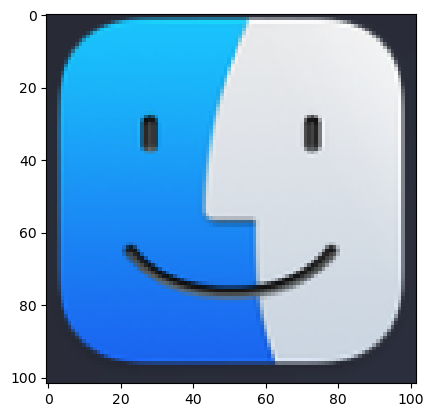

In [3]:
finder_image = plt.imread("finder.png")
plt.imshow(finder_image)

对数组的0轴进行反向切片，实现图像的垂直翻转。

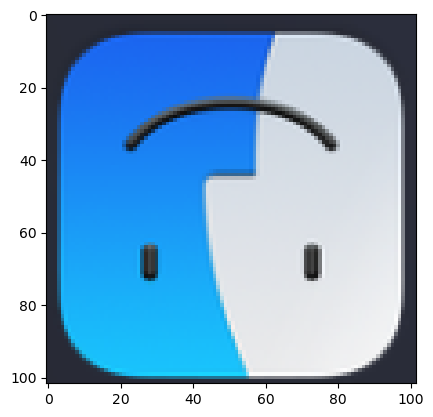

In [47]:
plt.imshow(finder_image[::-1])

### 这行代码实现了**图像的垂直翻转**。
- `finder_image[::-1]` 对图像数组的第`0`轴`（行轴）`进行反向切片
- 相当于把图像的第一行变成最后一行，最后一行变成第一行，实现上下翻转效果
- plt.imshow() 显示翻转后的图像

简单说就是把图片倒过来显示，像镜子垂直放置的效果。

---

### 为什么这里是第0轴？或者说为什么是行轴？还有其他种的轴？
在NumPy中，轴(axis)的编号从0开始：
- 第0轴（axis=0）：行轴，控制上下方向，沿着行的方向
- 第1轴（axis=1）：列轴，控制左右方向，沿着列的方向
- 第2轴（axis=2）：深度轴，对于图像是颜色通道（RGB）

对于图像数组 `shape=(height, width, channels)`：

- [::-1] 默认作用于第0轴，翻转行顺序 → 垂直翻转
- [:, ::-1] 作用于第1轴，翻转列顺序 → 水平翻转
- [:, :, ::-1] 作用于第2轴，翻转颜色通道 → 颜色翻转

这就是为什么 finder_image[::-1] 实现垂直翻转的原因。

顺带一提，普通的三维数组的轴的顺序和图像三维数组是不一样的。

普通的三维数组：
- 轴0: 深度轴
- 轴1: 行轴
- 轴2: 列轴

---



对数组的1轴进行反向切片，实现图像的水平翻转。

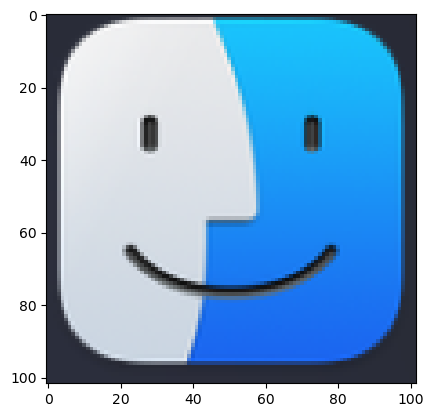

In [4]:
plt.imshow(finder_image[:, ::-1])

通过切片操作实现抠图

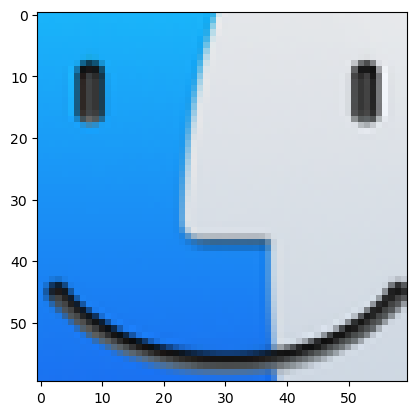

In [5]:
plt.imshow(finder_image[20:80, 20:80])

通过切片操作实现降采样

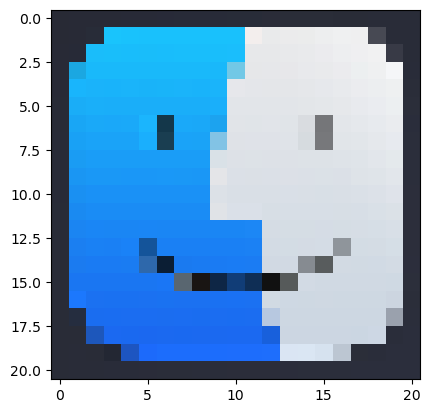

In [8]:
plt.imshow(finder_image[::5, ::5])